<a href="https://colab.research.google.com/github/ReginaDivaDharma/sentimentAnalysisCountVectorizer/blob/main/SentimentAnalysis_%5BCount_Vectorizer%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Within this project i am using Count Vectorizer to do sentiment analysis using 5 machine algorithms such as KNN, SVM, Naive Bayes, Logistic Regression, and random forest. My objective is to find the best performing machine algorithm to do this task by using a confusion matrix to see their performance.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import string
import seaborn as sns
from wordcloud import WordCloud

import nltk
import spacy
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import shuffle
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score, precision_score, recall_score
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/Womens Clothing E-Commerce Reviews.csv', index_col=0)
print(data.shape)
data.head(3)

(23486, 10)


,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses


In [ ]:
# Search for missing values
data.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [ ]:
# Map Recommended IND and Rating to sentiment scores
sentimentScore = {(0, 1): 0, (0, 2): 0, (0, 3): 0, (1, 4): 1, (1, 5): 1}
sentiment = {0: 'Negative', 1: 'Positive'}

# Mapping
data['sentimentScore'] = data.apply(lambda row: sentimentScore.get((row['Recommended IND'], row['Rating']), -1), axis=1)
data['sentiment'] = data['sentimentScore'].map(sentiment)
data.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,sentimentScore,sentiment
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,1,Positive
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,1,Positive
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0,Negative
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,1,Positive
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,1,Positive


<Axes: xlabel='count', ylabel='Department Name'>

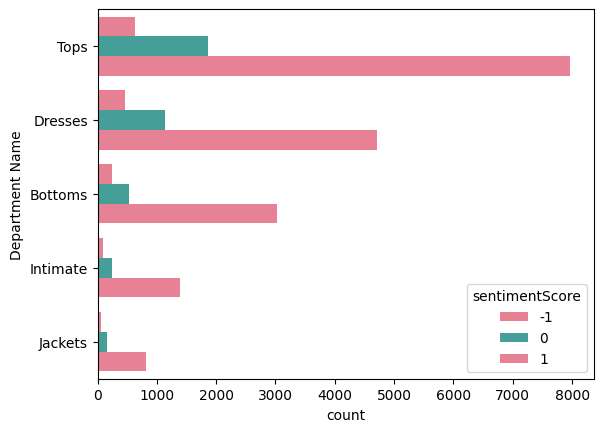

In [ ]:
# Clothings that get the most positive reviews
sns.countplot(data=data, y='Department Name', hue='sentimentScore', palette='husl', order=data['Department Name'].value_counts().iloc[:5].index)

In [ ]:
# Convert 'Review Text' column to strings, handling NaN values
positive_reviews = data[data['sentiment'] == 'Positive']['Review Text'].astype(str)

# Join the strings and split into words
positive_words = pd.Series(' '.join(positive_reviews).split())


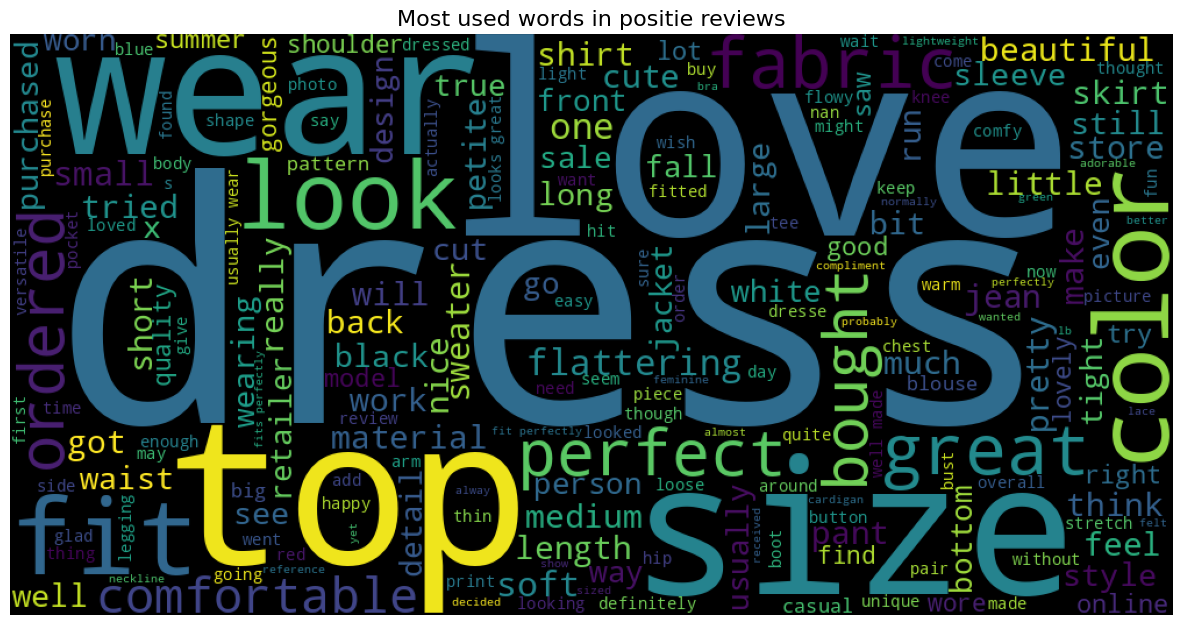

In [ ]:
# Plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(positive_words))

plt.figure(figsize = (15,8))

plt.imshow(wordcloud)
plt.title("Most used words in positie reviews", size = 16)

plt.axis("off")
plt.show()

In [ ]:
# Convert 'Review Text' column to strings, handling NaN values
negative_reviews = data[data['sentiment'] == 'Negative']['Review Text'].astype(str)

# Join the strings and split into words
negative_words = pd.Series(' '.join(negative_reviews).split())

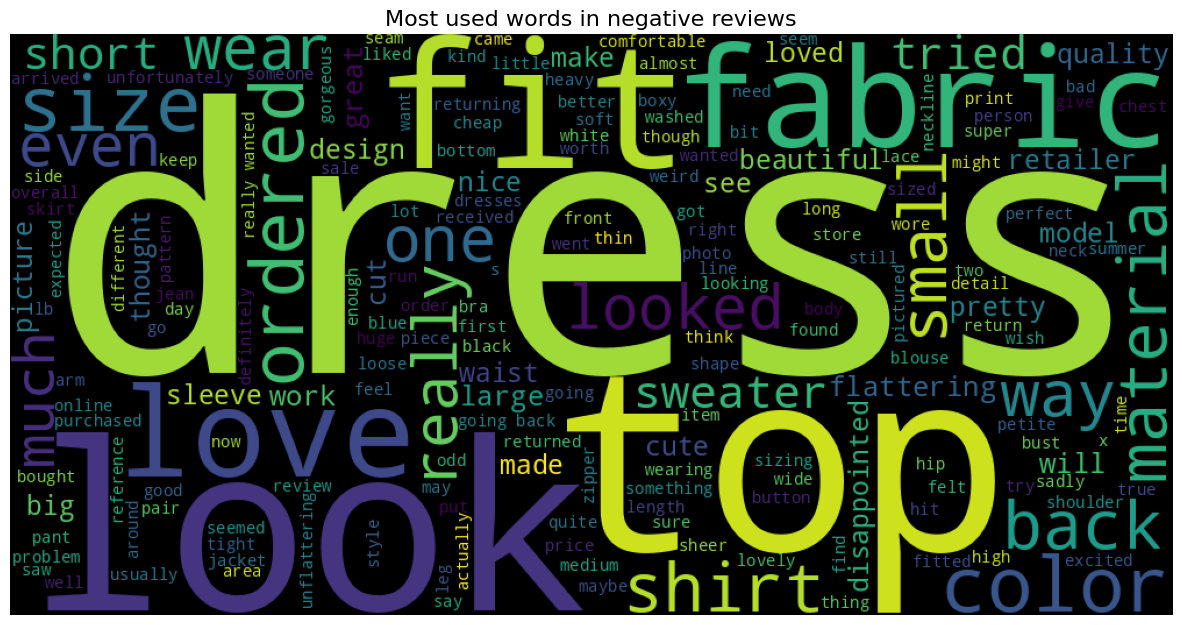

In [ ]:
# Plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(negative_words))

plt.figure(figsize = (15,8))

plt.imshow(wordcloud)
plt.title("Most used words in negative reviews", size = 16)

plt.axis("off")
plt.show()

In [ ]:
# Text Processing

#1 Clean text Function
def cleanText(text:str):
  text = str(text)
  text = text.lower()
  text = text.strip()

  text = re.sub(' \d+', ' ', text)
  text = re.compile('<.*?>').sub(' ', text)
  text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
  text = re.sub('\s+', ' ', text)

  text = text.strip()

  return text

In [ ]:
#2 Remove Stopwords
def removeStopwords(text:str):
    text = str(text)
    filteredSentence = []

    stopWords = ["a", "an", "the", "this", "that", "is", "it", "to", "and"]

    # Tokenize the sentence
    words = word_tokenize(text)
    for w in words:
        if w not in stopWords:
            filteredSentence.append(w)
    text = " ".join(filteredSentence)

    return text

In [ ]:
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# This is a helper function to map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [ ]:
#3 Lemmatize Function
def lemmatize(text:str):
    text = str(text)

    # Initialize the lemmatizer
    wl = WordNetLemmatizer()

    lemmatizedSentence = []

    # Tokenize the sentence
    words = word_tokenize(text)
    # Get position tags
    wordPosTags = nltk.pos_tag(words)
    # Map the position tag and lemmatize the word/token
    for idx, tag in enumerate(wordPosTags):
        lemmatizedSentence.append(wl.lemmatize(tag[0], get_wordnet_pos(tag[1])))

    lemmatizedText = " ".join(lemmatizedSentence)

    return lemmatizedText

In [ ]:
# Apply three of them to our dataset
# Clean text
data['text'] = data['Review Text'].apply(cleanText)

# Remove Stopwords
data['text'] = data['text'].apply(removeStopwords)

# Lemmatize
data['text'] = data['text'].apply(lemmatize)

In [ ]:
# Test
import random
idx = random.choice(range(len(data)))

print(f"The original text: \n{data['Review Text'].iloc[idx]}\n")
print(f"The cleaned text: \n{data['text'].iloc[idx]}")

The original text: 
I had ordered another retailer suit awhile back in an xl because my usual lg was not available, and lets say i was swimming in the xl, much to big. so when this suit came up for sale i snatched it up in lg. when i compare the two, the lg is over 4inches smaller than the xl, seems like quite a big jump in the sizing. the suit fits in the body quite well, however it's a bit snug in the side bust area. strangely, the suit has boning on the side of the bust, and also the silicone grip on the top edge,

The cleaned text: 
i have order another retailer suit awhile back in xl because my usual lg be not available let say i be swim in xl much big so when suit come up for sale i snatch up in lg when i compare two lg over inch small than xl seem like quite big jump in size suit fit in body quite well however s bit snug in side bust area strangely suit have bone on side of bust also silicone grip on top edge


In [ ]:
data.to_csv('cleanedDataset.csv', index = False)

In [ ]:
# New dataframe
data = pd.read_csv('cleanedDataset.csv')

In [ ]:
# Data type
data.dtypes

Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
sentimentScore              int64
sentiment                  object
text                       object
dtype: object

In [ ]:
# Check if there are some missing values
data[data['text'].isnull()]

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,sentimentScore,sentiment,text
92,861,23,NaN,NaN,5,1,0,General Petite,Tops,Knits,1,Positive,NaN
93,1081,31,NaN,NaN,5,1,0,General,Dresses,Dresses,1,Positive,NaN
98,1133,50,NaN,NaN,5,1,0,General,Jackets,Outerwear,1,Positive,NaN
135,861,35,NaN,NaN,4,1,0,General Petite,Tops,Knits,1,Positive,NaN
142,1126,35,NaN,NaN,5,1,0,General,Jackets,Outerwear,1,Positive,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23258,862,35,NaN,NaN,4,1,0,General,Tops,Knits,1,Positive,NaN
23301,862,52,NaN,NaN,5,1,0,General,Tops,Knits,1,Positive,NaN
23303,823,46,NaN,NaN,5,1,0,General,Tops,Blouses,1,Positive,NaN
23470,1104,39,NaN,NaN,5,1,0,General Petite,Dresses,Dresses,1,Positive,NaN


In [ ]:
# drop null values
data.dropna(inplace = True)
data.isnull().sum()

Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
sentimentScore             0
sentiment                  0
text                       0
dtype: int64

In [ ]:
data.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,sentimentScore,sentiment,text
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0,Negative,i have such high hope for dress really want wo...
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,1,Positive,i love love love jumpsuit s fun flirty fabulou...
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,1,Positive,shirt very flatter all due adjustable front ti...
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,0,Negative,i love tracy reese dress but one not for very ...
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,1,Positive,i aded in my basket at hte last mintue see wha...


In [ ]:
#Take the text column and Recommend IND save it to a new Dataframe

sentimentText = data[["text","Recommended IND"]]
sentimentText.head()

,text,Recommended IND
2,i have such high hope for dress really want wo...,0
3,i love love love jumpsuit s fun flirty fabulou...,1
4,shirt very flatter all due adjustable front ti...,1
5,i love tracy reese dress but one not for very ...,0
6,i aded in my basket at hte last mintue see wha...,1


In [ ]:
#Check Data Proportions

sentimentText['Recommended IND'].value_counts()

1    14980
0     3408
Name: Recommended IND, dtype: int64

In [ ]:
#Try undersample from new dataframe
target_count = sentimentText['Recommended IND'].value_counts()
negativeClass = sentimentText[sentimentText['Recommended IND'] == 0]
positiveClass = sentimentText[sentimentText['Recommended IND'] == 1].sample(n=
sentimentText['Recommended IND'].value_counts()[0], random_state=123)
dataBalance= pd.concat([positiveClass,negativeClass])
dataBalance.head()

,text,Recommended IND
700,i get in blue also in white both size medium s...,1
13051,i be 3 lb i order on whim i m so happy i do be...,1
22080,what beautiful harbinger of spring blouse so l...,1
6307,buy in pink for wed summer dress detail note a...,1
10192,excited get sweater i m c usually wear size bl...,1


In [ ]:
dataBalance['Recommended IND'].value_counts()

1    3408
0    3408
Name: Recommended IND, dtype: int64

In [ ]:
# CountVectorizer implementation
vect = CountVectorizer(max_features=700)
vect.fit(dataBalance['text']) #filled with undersample dataframe results
features = vect.transform(dataBalance['text']) #filled with undersample dataframe results


In [ ]:
count_vectorizer_df = pd.DataFrame(features.toarray(), columns=vect.get_feature_names_out())
count_vectorizer_df.head()

,10,able,about,above,absolutely,across,actually,add,addition,adorable,...,xl,xs,xx,year,yellow,yet,you,your,zip,zipper
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
# Split dataset
x_train, x_test, y_train, y_test = train_test_split(count_vectorizer_df, dataBalance['Recommended IND'], test_size=0.2, random_state=42)

In [ ]:
# Model Naive Bayes
def modeling(Model, xTrain = x_train, xTest = x_test):
    # Instantiate the classifier: model
    model = Model

    # Fitting classifier to the Training set (all features)
    model.fit(xTrain, y_train)

    global y_pred
    # Predicting the Test set results
    y_pred = model.predict(xTest)

    print('Precision : ', precision_score(y_test, y_pred))
    print('F-1 Score : ', f1_score(y_test, y_pred, average='macro'))
    print('Recall :', recall_score(y_test, y_pred))

    # Assign f1 score to a variable
    print(classification_report(y_test, y_pred))
    print ('AUC ',roc_auc_score(y_test, y_pred))

    #cm = confusion_matrix(y_test, y_pred)
    confusion_matrix = pd.crosstab(index=y_test, columns=np.round(y_pred), rownames=['Actual'], colnames=['Predictions']).astype(int)
    plt.figure(figsize = (8,8))

    sns.heatmap(confusion_matrix, annot=True,annot_kws={"fontsize":14}, fmt='.2f', cmap='Greens').set_title('Confusion Matrix for Naive Bayes')

Precision :  0.9003067484662577
F-1 Score :  0.8775311604990841
Recall : 0.8519593613933236
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       675
           1       0.90      0.85      0.88       689

    accuracy                           0.88      1364
   macro avg       0.88      0.88      0.88      1364
weighted avg       0.88      0.88      0.88      1364

AUC  0.8778315325485136


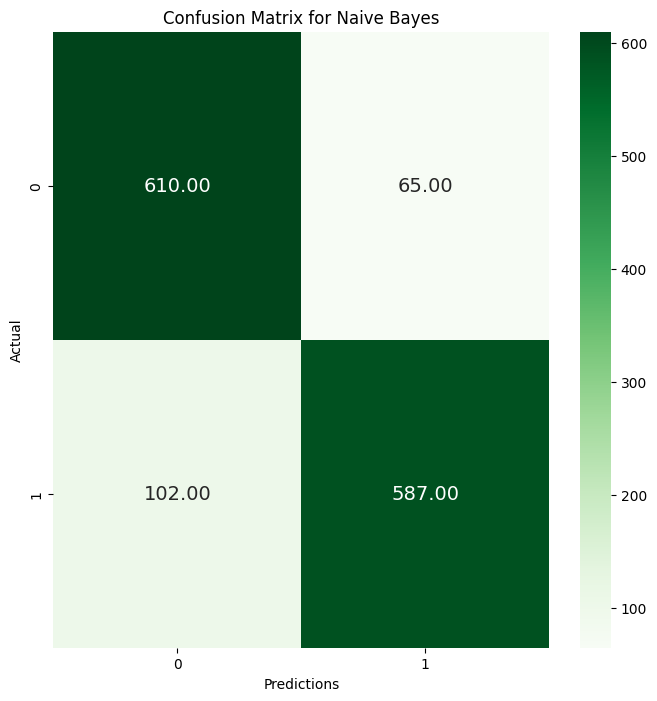

In [ ]:
# Naive Bayes
modeling(MultinomialNB())

In [ ]:
# Model K-Nearest Neighbors (KNN)
def modeling_knn(knn_model, xTrain=x_train, xTest=x_test):

    # Instantiate the classifier
    model = knn_model

    # Fitting classifier to the Training set (all features)
    model.fit(xTrain, y_train)

    # Predicting the Test set results
    y_pred = model.predict(xTest)

    # Print classification report
    print(classification_report(y_test, y_pred))

    # Print AUC score
    print('AUC:', roc_auc_score(y_test, y_pred))
    print('Precision : ', precision_score(y_test, y_pred))
    print('F-1 Score : ', f1_score(y_test, y_pred, average='macro'))
    print('Recall :', recall_score(y_test, y_pred))

    # Generate confusion matrix
    confusion_matrix = pd.crosstab(index=y_test, columns=np.round(y_pred), rownames=['Actual'], colnames=['Predictions']).astype(int)

    # Plot confusion matrix
    plt.figure(figsize=(8, 8))
    sns.heatmap(confusion_matrix, annot=True, annot_kws={"fontsize": 14}, fmt='.2f', cmap='Blues').set_title('Confusion Matrix for KNN')
    plt.show()


              precision    recall  f1-score   support

           0       0.70      0.73      0.72       675
           1       0.73      0.69      0.71       689

    accuracy                           0.71      1364
   macro avg       0.71      0.71      0.71      1364
weighted avg       0.71      0.71      0.71      1364

AUC: 0.7121098747513842
Precision :  0.7262996941896025
F-1 Score :  0.7118085217910223
Recall : 0.6894049346879536


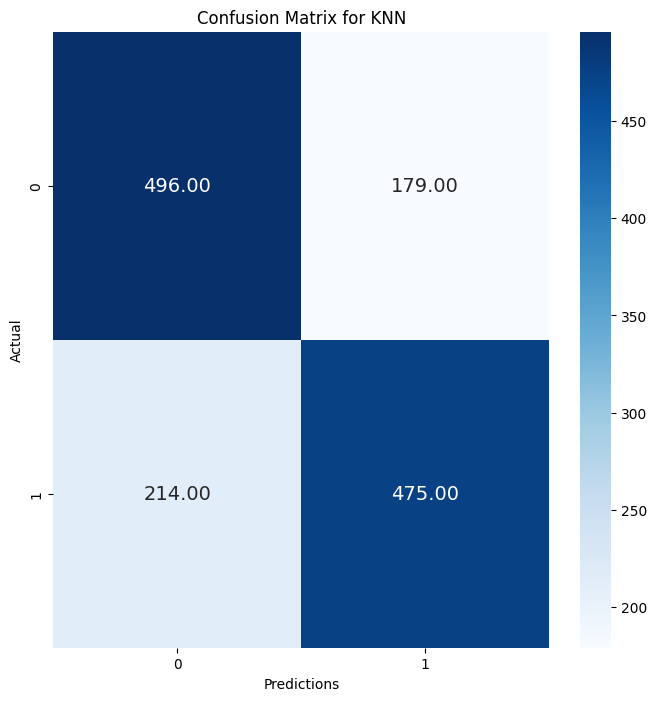

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)  #  with 5 neighbors
modeling_knn(knn_model)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       675
           1       0.88      0.84      0.86       689

    accuracy                           0.86      1364
   macro avg       0.86      0.86      0.86      1364
weighted avg       0.86      0.86      0.86      1364

AUC: 0.8579970972423804
Precision :  0.8767123287671232
F-1 Score :  0.8577464879591779
Recall : 0.8359941944847605


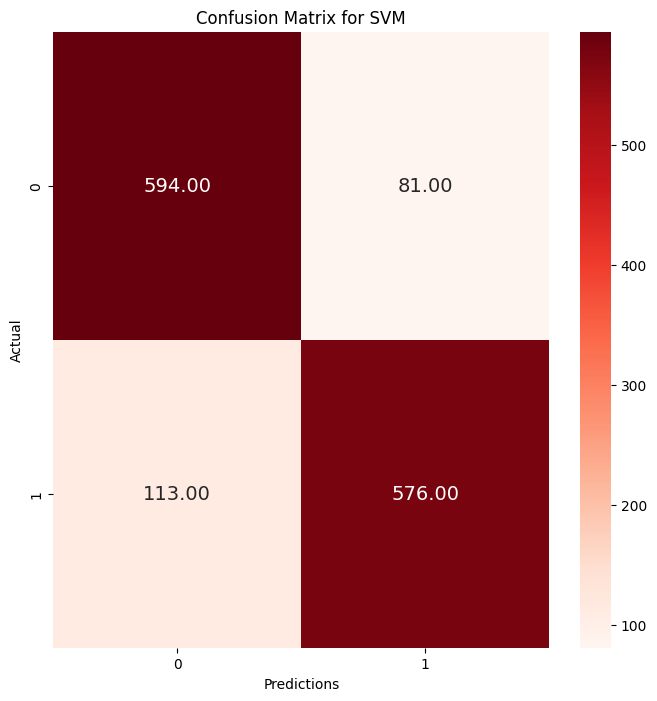

AUC: 0.8579970972423804


In [ ]:
def modeling_svm(svm_model, xTrain=x_train, xTest=x_test, yTrain=y_train, yTest=y_test):
    try:
        # Fitting classifier to the Training set
        svm_model.fit(xTrain, yTrain)

        # Predicting the Test set results
        y_pred = svm_model.predict(xTest)

        # Print classification report
        print("Classification Report:")
        print(classification_report(yTest, y_pred))

        # Print AUC score
        auc = roc_auc_score(yTest, y_pred)
        print('AUC:', auc)
        print('Precision : ', precision_score(y_test, y_pred))
        print('F-1 Score : ', f1_score(y_test, y_pred, average='macro'))
        print('Recall :', recall_score(y_test, y_pred))

        # Generate confusion matrix
        confusion_matrix = pd.crosstab(index=yTest, columns=np.round(y_pred), rownames=['Actual'], colnames=['Predictions']).astype(int)

        # Plot confusion matrix
        plt.figure(figsize=(8, 8))
        sns.heatmap(confusion_matrix, annot=True, annot_kws={"fontsize": 14}, fmt='.2f', cmap='Reds').set_title('Confusion Matrix for SVM')
        plt.show()

        return auc
    except Exception as e:
        print("An error occurred during model training:", e)
        return None

# SVM Usage with Gamma 1.0
svm_model = SVC(kernel='linear', C=1.0)
auc = modeling_svm(svm_model)
if auc is not None:
    print("AUC:", auc)


In [ ]:
def modeling_random_forest(rf_model, xTrain=x_train, xTest=x_test):
    # Instantiate the classifier
    model = rf_model

    # Fitting classifier to the Training set (all features)
    model.fit(xTrain, y_train)

    # Predicting the Test set results
    y_pred = model.predict(xTest)

    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Print AUC score
    print('AUC:', roc_auc_score(y_test, y_pred))
    print('Precision : ', precision_score(y_test, y_pred))
    print('F-1 Score : ', f1_score(y_test, y_pred, average='macro'))
    print('Recall :', recall_score(y_test, y_pred))

    # Generate confusion matrix
    confusion_matrix = pd.crosstab(index=y_test, columns=np.round(y_pred), rownames=['Actual'], colnames=['Predictions']).astype(int)

    # Plot confusion matrix
    plt.figure(figsize=(8, 8))
    sns.heatmap(confusion_matrix, annot=True, annot_kws={"fontsize": 14}, fmt='.2f', cmap='Greens').set_title('Confusion Matrix for Random Forest')
    plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       675
           1       0.87      0.84      0.85       689

    accuracy                           0.85      1364
   macro avg       0.86      0.86      0.85      1364
weighted avg       0.86      0.85      0.85      1364

AUC: 0.8550341342794174
Precision :  0.8714069591527988
F-1 Score :  0.8548234155781326
Recall : 0.8359941944847605


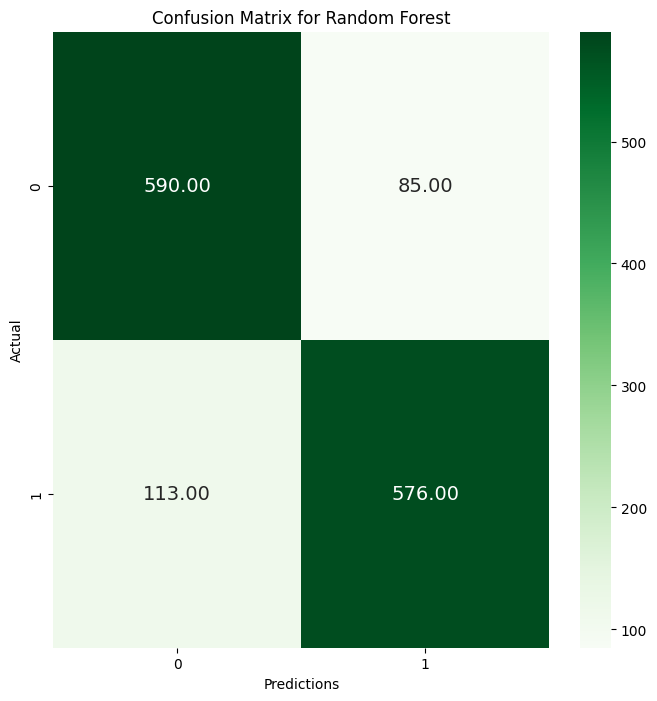

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100)  # with 100 trees
modeling_random_forest(rf_model)

In [ ]:
def modeling_logistic_regression(lr_model, xTrain=x_train, xTest=x_test, yTrain=y_train, yTest=y_test):

    # Fitting classifier to the Training set
    lr_model.fit(xTrain, yTrain)

    # Predicting the Test set results
    y_pred = lr_model.predict(xTest)

    # Print classification report
    print("Classification Report:")
    print(classification_report(yTest, y_pred))

    # Print AUC score
    auc = roc_auc_score(yTest, y_pred)
    print('AUC:', auc)
    print('Precision : ', precision_score(y_test, y_pred))
    print('F-1 Score : ', f1_score(y_test, y_pred, average='macro'))
    print('Recall :', recall_score(y_test, y_pred))

    # Generate confusion matrix
    confusion_matrix = pd.crosstab(index=yTest, columns=np.round(y_pred), rownames=['Actual'], colnames=['Predictions']).astype(int)

    # Plot confusion matrix
    plt.figure(figsize=(8, 8))
    sns.heatmap(confusion_matrix, annot=True, annot_kws={"fontsize": 14}, fmt='.2f', cmap='Blues').set_title('Confusion Matrix for Logistic Regression')
    plt.show()

    return auc

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       675
           1       0.88      0.86      0.87       689

    accuracy                           0.87      1364
   macro avg       0.87      0.87      0.87      1364
weighted avg       0.87      0.87      0.87      1364

AUC: 0.8696382303929474
Precision :  0.8819133034379671
F-1 Score :  0.869498941122088
Recall : 0.8563134978229318


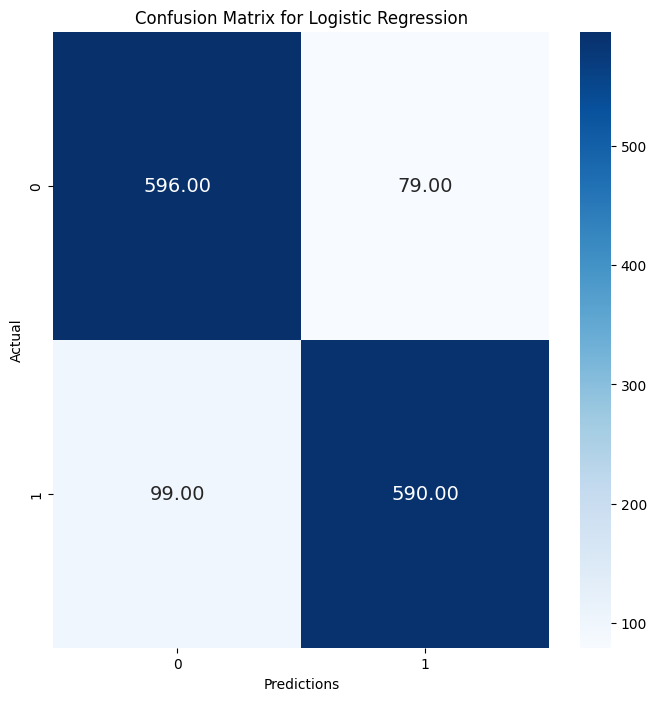

AUC: 0.8696382303929474


In [ ]:
lr_model = LogisticRegression()
auc = modeling_logistic_regression(lr_model)
if auc is not None:
    print("AUC:", auc)